In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!unzip /content/drive/MyDrive/CNN2/new_alzheimer_cnn.zip


Archive:  /content/drive/MyDrive/CNN2/new_alzheimer_cnn.zip
replace new_alzheimer_cnn/MildDemented/mildDem0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import tensorflow as tf
import os
import numpy as np
from sklearn.model_selection import train_test_split
from PIL import Image
from tensorflow.keras import models, layers

# Define a function to read in an image file and convert it to a numpy array
def read_image(file_path, size=(256, 256)):
    with Image.open(file_path) as img:
        img = img.resize(size)
        img = img.convert('RGB')
        img_data = np.asarray(img)
    return img_data


# Assuming you have two directories, one for each class, containing your images
class1_dir = '/content/new_alzheimer_cnn/MildDemented'
class2_dir = '/content/new_alzheimer_cnn/ModerateDemented'
class3_dir = '/content/new_alzheimer_cnn/NonDemented'
class4_dir = '/content/new_alzheimer_cnn/VeryMildDemented'



# Read in the images and labels for each class
class1_images = [read_image(os.path.join(class1_dir, file)) for file in os.listdir(class1_dir)]
class1_labels = [0] * len(class1_images) # Use 0 to represent class 1

class2_images = [read_image(os.path.join(class2_dir, file)) for file in os.listdir(class2_dir)]
class2_labels = [1] * len(class2_images) # Use 1 to represent class 2

class3_images = [read_image(os.path.join(class3_dir, file)) for file in os.listdir(class3_dir)]
class3_labels = [2] * len(class3_images) # Use 2 to represent class 3

class4_images = [read_image(os.path.join(class4_dir, file)) for file in os.listdir(class4_dir)]
class4_labels = [3] * len(class4_images) # Use 3 to represent class 4



# Combine the images and labels into a single dataset
images = class1_images + class2_images + class3_images + class4_images
labels = class1_labels + class2_labels + class3_labels + class4_labels
# Split the dataset into training, validation, and test sets
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

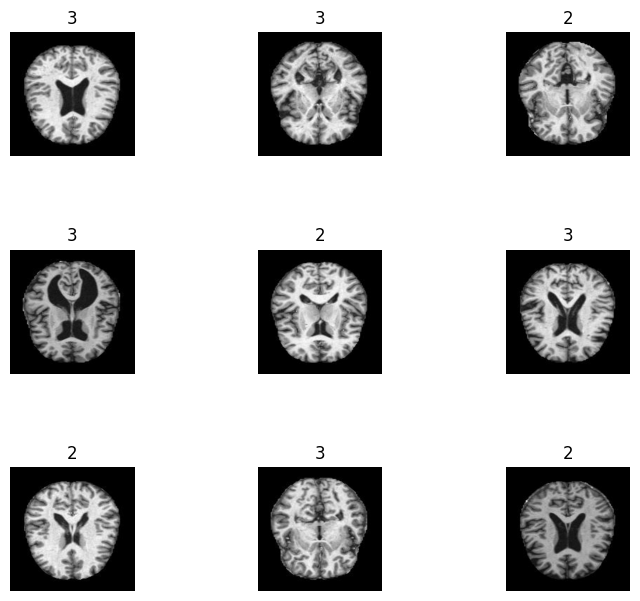

In [ ]:
import matplotlib.pyplot as plt

# create a function to display images and their labels
def show_images(images, labels):
    fig, axes = plt.subplots(3, 3, figsize=(8, 8))
    axes = axes.ravel()
    for i in np.arange(0, 9):
        axes[i].imshow(images[i])
        axes[i].set_title(labels[i])
        axes[i].axis('off')
        plt.subplots_adjust(wspace=1)
    plt.show()

# call the show_images function with the X_train and Y_train data
show_images(X_train, Y_train)

In [ ]:
Y_train[:5]

[3, 3, 2, 3, 2]

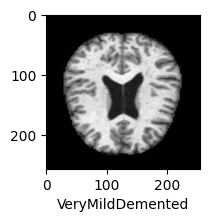

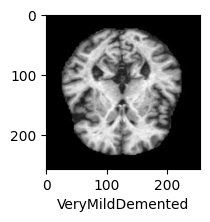

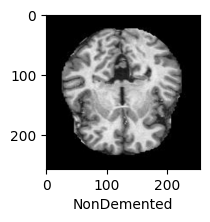

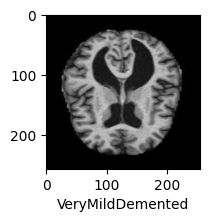

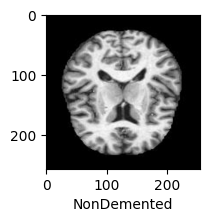

In [ ]:
classes=['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']
def plot_sample(X, y, index):
    plt.figure(figsize = (2,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
for i in range(0,5):
 plot_sample(X_train, Y_train, i)

In [ ]:
import numpy as np
def normalize_image(img):
    # Convert the image to float data type
    img = img.astype('float32')

    # Normalize the image pixels to have zero mean and unit variance
    img -= np.mean(img)
    img /= np.std(img)

    return img

X_train = np.array([normalize_image(img) for img in X_train])
X_test = np.array([normalize_image(img) for img in X_test])
X_val = np.array([normalize_image(img) for img in X_val])

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', input_shape=(256,256, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),


    layers.Flatten(),
    layers.Dense(16, activation='relu'),
    layers.Dense(4, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn.fit(X_train, np.array(Y_train), epochs=25)

Epoch 1/25
103/103 [==============================] - 16s 79ms/step - loss: 1.0197 - accuracy: 0.5226
Epoch 2/25
103/103 [==============================] - 7s 71ms/step - loss: 0.7372 - accuracy: 0.6770
Epoch 3/25
103/103 [==============================] - 7s 68ms/step - loss: 0.4929 - accuracy: 0.8077
Epoch 4/25
103/103 [==============================] - 7s 71ms/step - loss: 0.2534 - accuracy: 0.9167
Epoch 5/25
103/103 [==============================] - 8s 80ms/step - loss: 0.1012 - accuracy: 0.9707
Epoch 6/25
103/103 [==============================] - 9s 83ms/step - loss: 0.0832 - accuracy: 0.9731
Epoch 7/25
103/103 [==============================] - 7s 69ms/step - loss: 0.0672 - accuracy: 0.9789
Epoch 8/25
103/103 [==============================] - 7s 71ms/step - loss: 0.0696 - accuracy: 0.9799
Epoch 9/25
103/103 [==============================] - 7s 68ms/step - loss: 0.0830 - accuracy: 0.9744
Epoch 10/25
103/103 [==============================] - 7s 71ms/step - loss: 0.0281 - accur

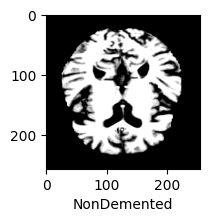

In [ ]:
plot_sample(X_test, Y_test,15)


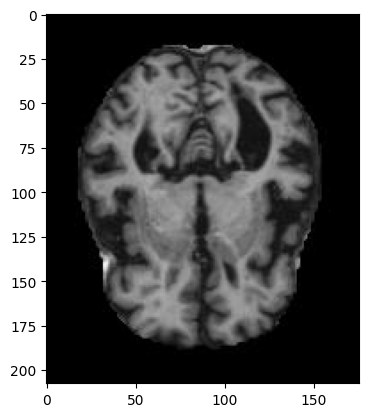

In [ ]:
import cv2
img = cv2.imread('/content/new_alzheimer_cnn/MildDemented/mildDem0.jpg') #loading the image
plt.imshow(img)
plt.show()

In [ ]:
class_names = ['MildDemented','ModerateDemented','NonDemented','VeryMildDemented']

# Load an image to test
test_image = read_image('/content/new_alzheimer_cnn/MildDemented/mildDem0.jpg')

# Normalize the image
test_image = normalize_image(test_image)

# Reshape the image into a batch of size 1
test_image = test_image.reshape(1, 256,256, 3)

# Use the predict() method of the Keras model to get the probabilities for each class
class_probabilities = cnn.predict(test_image)

# Use the argmax() method of numpy to get the index of the class with the highest probability
predicted_class_index = np.argmax(class_probabilities)

# Get the predicted class name from the list of class names
predicted_class_name = class_names[predicted_class_index]

# Print the predicted class name
print("Predicted class:", predicted_class_name)

1/1 [==============================] - 0s 334ms/step
Predicted class: MildDemented


In [ ]:
cnn.save("/content/Model_new/Alzheimer_classifier")

In [ ]:
loaded_model = tf.keras.models.load_model("/content/Model_new/Alzheimer_classifier")

In [ ]:
import shutil

# Compress the saved model directory
shutil.make_archive("/content/Model_new_zip/Alzheimer_classifier", 'zip', "/content/Model_new/Alzheimer_classifier")


'/content/Model_new_zip/Alzheimer_classifier.zip'

In [ ]:
from google.colab import files
files.download("/content/Model_new_zip/Alzheimer_classifier.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>